In [342]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import joblib

In [46]:
# read fold for check
f1 = pd.read_csv("../Anny_oversampling/fold2.csv")
f2 = pd.read_csv("../Anny_oversampling/fold2.csv")
f3 = pd.read_csv("../Anny_oversampling/fold3.csv")
f4 = pd.read_csv("../Anny_oversampling/fold4.csv")
f5 = pd.read_csv("../Anny_oversampling/fold5.csv")

# read raw data
raw_data = pd.read_csv("../raw_data/data.csv")

# Review

In [47]:
# run it once
raw_data = raw_data.drop(labels='Unnamed: 32', axis=1)
raw_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [48]:
print("########## the fold ############")
print("fold1: "+ str(len(f1)))
print("fold2: "+ str(len(f2)))
print("fold3: "+ str(len(f3)))
print("fold4: "+ str(len(f4)))
print("fold5: "+ str(len(f5)))
print("\ntotal: " + str(len(f1) + len(f2) + len(f3) + len(f4) + len(f5)))
print("################################")

########## the fold ############
fold1: 91
fold2: 91
fold3: 91
fold4: 91
fold5: 91

total: 455
################################


In [49]:
y_f1 = f1[f1.columns[1]]
le = LabelEncoder()
y_f1 = np.array(le.fit_transform(y_f1))
print("y_f1:", le.classes_)
y_f2 = f2[f2.columns[1]]
le = LabelEncoder()
y_f2 = np.array(le.fit_transform(y_f2))
print("y_f2:",le.classes_)
y_f3 = f3[f3.columns[1]]
le = LabelEncoder()
y_f3 = np.array(le.fit_transform(y_f3))
print("y_f3:",le.classes_)
y_f4 = f4[f4.columns[1]]
le = LabelEncoder()
y_f4 = np.array(le.fit_transform(y_f4))
print("y_f4:",le.classes_)
y_f5 = f5[f5.columns[1]]
le = LabelEncoder()
y_f5 = np.array(le.fit_transform(y_f5))
print("y_f5:",le.classes_)

y_f1: ['B' 'M']
y_f2: ['B' 'M']
y_f3: ['B' 'M']
y_f4: ['B' 'M']
y_f5: ['B' 'M']


In [50]:
# check balance in each fold
print("------ fold ------")
print("f1 positive: " + str(sum(y_f1)))
print("f1 negative: " + str(len(f1) - sum(y_f1)))
print("------------------")
print("f2 positive: " + str(sum(y_f2)))
print("f2 negative: " + str(len(f2) - sum(y_f2)))
print("------------------")
print("f3 positive: " + str(sum(y_f3)))
print("f3 negative: " + str(len(f3) - sum(y_f3)))
print("------------------")
print("f4 positive: " + str(sum(y_f4)))
print("f4 negative: " + str(len(f4) - sum(y_f4)))
print("------------------")
print("f5 positive: " + str(sum(y_f5)))
print("f5 negative: " + str(len(f5) - sum(y_f5)))
print("------------------")

------ fold ------
f1 positive: 38
f1 negative: 53
------------------
f2 positive: 38
f2 negative: 53
------------------
f3 positive: 25
f3 negative: 66
------------------
f4 positive: 19
f4 negative: 72
------------------
f5 positive: 23
f5 negative: 68
------------------


# Function

In [51]:
# tn, fp, fn, tp = each_index(cm)
def each_index(metrix):
    TN = metrix[0][0]
    FP = metrix[0][1]
    FN = metrix[1][0]
    TP = metrix[1][1]
    return TN, FP, FN, TP

In [52]:
def sensitivity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate sensitivity
    sensitivity = TP / (TP + FN) * 100
    print("Sensitivity: %.2f%%" % sensitivity)
    return sensitivity

In [53]:
def specificity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate specificity
    specificity = TN / (TN + FP) * 100
    print("Specificity: %.2f%%" % specificity)
    return specificity

In [54]:
def accuracy(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    accuracy = ((TP + TN) / (TP + TN + FP + FN)) *100
    print("Accuracy: %.2f%%" % accuracy)
    return accuracy

In [55]:
def precision(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    precision = (TP / (TP + FP)) *100
    print("Precision: %.2f%%" % precision)
    return precision

In [56]:
def f1(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate f1
    recall = sensitivity(metrix)
    pre = precision(metrix)
    f1 = ((2*pre*recall) / (pre+recall))
    print("F1: %.2f%%" % f1)
    return f1

# Split1

In [151]:
# setting split and path
split = 'split1'
path = "../Anny_oversampling/DATA/"
train_path = "{}/{}/train/train_{}.csv".format(path,split,split)
test_path =  "{}/test.csv".format(path)
valid_path = "{}/{}/val/val_{}.csv".format(path,split,split)

In [152]:
# check if path is correct
print(train_path)
print(test_path)
print(valid_path)

../Anny_oversampling/DATA//split1/train/train_split1.csv
../Anny_oversampling/DATA//test.csv
../Anny_oversampling/DATA//split1/val/val_split1.csv


In [153]:
# Load the training set
train_data = pd.read_csv(train_path)
print(train_data.shape)
x_train = train_data[train_data.columns[2:]]
print(x_train.shape)
y_train = train_data[train_data.columns[1]]
le = LabelEncoder()
y_train = np.array(le.fit_transform(y_train))
print(le.classes_)

(364, 32)
(364, 30)
['B' 'M']


In [154]:
# Load the testing set
test_data = pd.read_csv(test_path)
print(test_data.shape)
x_test = test_data[test_data.columns[3:]]
print(x_test.shape)
y_test = test_data[test_data.columns[2]]
le = LabelEncoder()
y_test = np.array(le.fit_transform(y_test))
print(le.classes_)

(114, 33)
(114, 30)
['B' 'M']


In [155]:
# Load the validation set
val_data = pd.read_csv(valid_path)
print(val_data.shape)
x_val = val_data[val_data.columns[2:]]
print(x_val.shape)
y_val = val_data[val_data.columns[1]]
le = LabelEncoder()
y_val = np.array(le.fit_transform(y_val))
print(le.classes_)

(91, 32)
(91, 30)
['B' 'M']


In [156]:
# Load the raw set
x_raw = raw_data[raw_data.columns[2:]]
y_raw = raw_data[raw_data.columns[1]]
le = LabelEncoder()
y_raw = np.array(le.fit_transform(y_raw))
print(le.classes_)

['B' 'M']


In [157]:
# check balance in this split
print(split)
print("train positive:    " + str(sum(y_train)))
print("validate positive: " + str(sum(y_val)))

split1
train positive:    105
validate positive: 39


In [158]:
from sklearn.model_selection import train_test_split

print("Shape of training set:", x_train.shape)
print("Shape of test set:", x_test.shape)

Shape of training set: (364, 30)
Shape of test set: (114, 30)


In [159]:
# Define a custom dataset class
class WisconsinDataset(Dataset):
    def __init__(self, x, y):
        self.X = x.values
        self.y = y
        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y, dtype=torch.int64)
        
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
batch = 1
# Initialize the datasets and data loaders
val_dataset = WisconsinDataset(x_val, y_val)
train_dataset = WisconsinDataset(x_train, y_train)
test_dataset = WisconsinDataset(x_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1)
val_loader = DataLoader(val_dataset, batch_size=batch)

dataloaders = {
    'train': train_loader
    , 'valid': val_loader}

print("######### Check balance! ##########")
print(split)
# train
count_train = 0
for image,label in train_dataset:
    count_train = count_train + label
print("Train have abnormal: {}".format(count_train))
print("Train have normal: {}".format(len(train_dataset) - count_train))
print(" * Train difference: {}".format(abs(len(train_dataset) - (2*count_train))))
# val
count_val = 0
for image,label in val_dataset:
    count_val = count_val + label
print("Validate have abnormal: {}".format(count_val))
print("Validate have normal: {}".format(len(val_dataset) - count_val))
print(" * Validate difference: {}".format(abs(len(val_dataset) - (2*count_val))))
# test
count_test = 0
for image,label in test_dataset:
    count_test = count_test + label
print("Test have abnormal: {}".format(count_test))
print("Test have normal: {}".format(len(test_dataset) - count_test))
print("####################################")

######### Check balance! ##########
split1
Train have abnormal: 105
Train have normal: 259
 * Train difference: 154
Validate have abnormal: 39
Validate have normal: 52
 * Validate difference: 13
Test have abnormal: 68
Test have normal: 46
####################################


## step train - split1

In [160]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_val = x_val.to_numpy()

In [161]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)
x_val = ss.fit_transform(x_val)

In [148]:
dtc = DecisionTreeClassifier()

parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

grid_search = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(x_val, y_val)
print('Best criterion parameter:', grid_search.best_params_['criterion'])
print('Best max_depth parameter:', grid_search.best_params_['max_depth'])
print('Best min_samples_leaf parameter:', grid_search.best_params_['min_samples_leaf'])
print('Best min_samples_split parameter:', grid_search.best_params_['min_samples_split'])
print('Best splitter parameter:', grid_search.best_params_['splitter'])
print('Best score:', grid_search.best_score_)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits
Best criterion parameter: gini
Best max_depth parameter: 22
Best min_samples_leaf parameter: 4
Best min_samples_split parameter: 4
Best splitter parameter: random
Best score: 0.9777777777777779


In [149]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 22,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'splitter': 'random'}

In [334]:
model = DecisionTreeClassifier(criterion="gini",
                             max_depth=22, min_samples_leaf=4, 
                             min_samples_split=4, splitter="random")

In [335]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=22, min_samples_leaf=4, min_samples_split=4,
                       splitter='random')

In [336]:
model_path = "../DTC/models/param1/dtc_model_{}.pkl".format(split)

# Save the trained model to disk
joblib.dump(model, model_path)

# Load the saved model from disk
model = joblib.load(model_path)

In [337]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0])

In [338]:
accuracy_score(y_test, y_pred)

0.8421052631578947

split1
############## validate set ################
Confusion Matrix
----------------
[[49  3]
 [ 4 35]] 

----------------
Sensitivity: 89.74%
Specificity: 94.23%
Accuracy: 92.31%
Precision: 92.11%
Sensitivity: 89.74%
Precision: 92.11%
F1: 90.91%


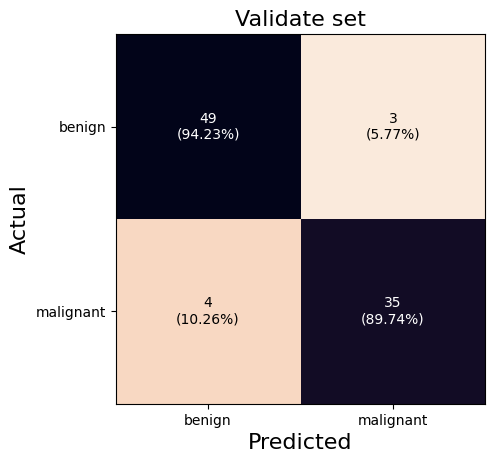

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [18 50]] 

----------------
Sensitivity: 73.53%
Specificity: 100.00%
Accuracy: 84.21%
Precision: 100.00%
Sensitivity: 73.53%
Precision: 100.00%
F1: 84.75%


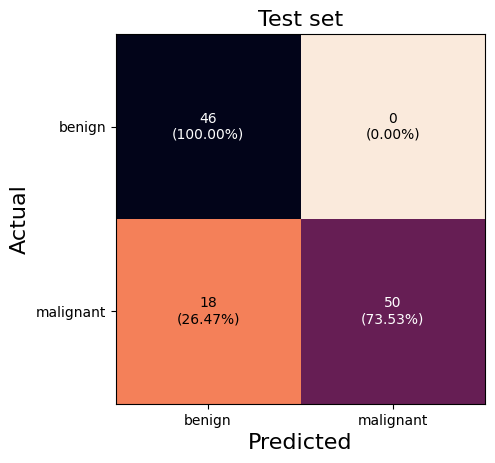

---------------------------------------
AUC validate: 0.9199
AUC test: 0.8676


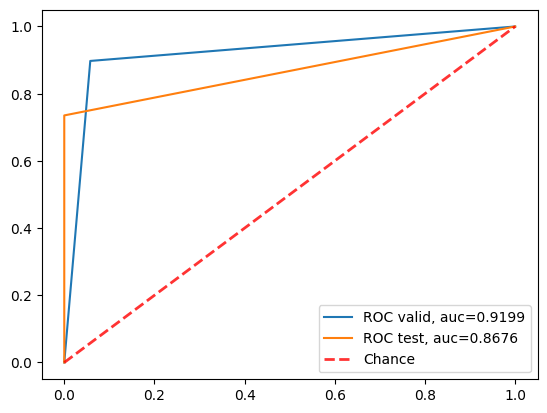

In [343]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_val = f1(cm_val)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)


# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split1 = sensitivity(cm_test)
spec_test_split1 = specificity(cm_test)
acc_test_split1 = accuracy(cm_test)
pre_test_split1 = precision(cm_test)
f1_test_split1 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split1 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split1)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split1))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
######################################################

# Split2

In [344]:
# setting split and path
split = 'split2'
path = "../Anny_oversampling/DATA/"
train_path = "{}/{}/train/train_{}.csv".format(path,split,split)
test_path = "{}/test.csv".format(path)
valid_path = "{}/{}/val/val_{}.csv".format(path,split,split)

In [345]:
# check if path is correct
print(train_path)
print(test_path)
print(valid_path)

../Anny_oversampling/DATA//split2/train/train_split2.csv
../Anny_oversampling/DATA//test.csv
../Anny_oversampling/DATA//split2/val/val_split2.csv


In [346]:
# Load the training set
train_data = pd.read_csv(train_path)
print(train_data.shape)
x_train = train_data[train_data.columns[2:]]
print(x_train.shape)
y_train = train_data[train_data.columns[1]]
le = LabelEncoder()
y_train = np.array(le.fit_transform(y_train))
print(le.classes_)

(364, 32)
(364, 30)
['B' 'M']


In [347]:
# Load the testing set
test_data = pd.read_csv(test_path)
print(test_data.shape)
x_test = test_data[test_data.columns[3:]]
print(x_test.shape)
y_test = test_data[test_data.columns[2]]
le = LabelEncoder()
y_test = np.array(le.fit_transform(y_test))
print(le.classes_)

(114, 33)
(114, 30)
['B' 'M']


In [348]:
# Load the validation set
val_data = pd.read_csv(valid_path)
print(val_data.shape)
x_val = val_data[val_data.columns[2:]]
print(x_val.shape)
y_val = val_data[val_data.columns[1]]
le = LabelEncoder()
y_val = np.array(le.fit_transform(y_val))
print(le.classes_)

(91, 32)
(91, 30)
['B' 'M']


In [349]:
# Load the raw set
x_raw = raw_data[raw_data.columns[2:]]
y_raw = raw_data[raw_data.columns[1]]
le = LabelEncoder()
y_raw = np.array(le.fit_transform(y_raw))
print(le.classes_)

['B' 'M']


In [350]:
# check balance in this split
print(split)
print("train positive:    " + str(sum(y_train)))
print("validate positive: " + str(sum(y_val)))

split2
train positive:    106
validate positive: 38


In [351]:
from sklearn.model_selection import train_test_split

print("Shape of training set:", x_train.shape)
print("Shape of test set:", x_test.shape)

Shape of training set: (364, 30)
Shape of test set: (114, 30)


In [353]:
# Define a custom dataset class
class WisconsinDataset(Dataset):
    def __init__(self, x, y):
        self.X = x.values
        self.y = y
        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y, dtype=torch.int64)
        
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [354]:
batch = 1
# Initialize the datasets and data loaders
val_dataset = WisconsinDataset(x_val, y_val)
train_dataset = WisconsinDataset(x_train, y_train)
test_dataset = WisconsinDataset(x_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1)
val_loader = DataLoader(val_dataset, batch_size=batch)

In [355]:
dataloaders = {
    'train': train_loader
    , 'valid': val_loader}

In [356]:
print("######### Check balance! ##########")
print(split)
# train
count_train = 0
for image,label in train_dataset:
    count_train = count_train + label
print("Train have abnormal: {}".format(count_train))
print("Train have normal: {}".format(len(train_dataset) - count_train))
print(" * Train difference: {}".format(abs(len(train_dataset) - (2*count_train))))
# val
count_val = 0
for image,label in val_dataset:
    count_val = count_val + label
print("Validate have abnormal: {}".format(count_val))
print("Validate have normal: {}".format(len(val_dataset) - count_val))
print(" * Validate difference: {}".format(abs(len(val_dataset) - (2*count_val))))
# test
count_test = 0
for image,label in test_dataset:
    count_test = count_test + label
print("Test have abnormal: {}".format(count_test))
print("Test have normal: {}".format(len(test_dataset) - count_test))
print("####################################")

######### Check balance! ##########
split2
Train have abnormal: 106
Train have normal: 258
 * Train difference: 152
Validate have abnormal: 38
Validate have normal: 53
 * Validate difference: 15
Test have abnormal: 68
Test have normal: 46
####################################


## step train - split2

In [357]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_val = x_val.to_numpy()

In [358]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)
x_val = ss.fit_transform(x_val)

In [359]:
# dtc = DecisionTreeClassifier()

# parameters = {
#     'criterion' : ['gini', 'entropy'],
#     'max_depth' : range(2, 32, 1),
#     'min_samples_leaf' : range(1, 10, 1),
#     'min_samples_split' : range(2
#                                 , 10, 1),
#     'splitter' : ['best', 'random']
# }

# grid_search = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
# grid_search.fit(x_raw, y_raw)
# print('Best criterion parameter:', grid_search.best_params_['criterion'])
# print('Best max_depth parameter:', grid_search.best_params_['max_depth'])
# print('Best min_samples_leaf parameter:', grid_search.best_params_['min_samples_leaf'])
# print('Best min_samples_split parameter:', grid_search.best_params_['min_samples_split'])
# print('Best splitter parameter:', grid_search.best_params_['splitter'])
# print('Best score:', grid_search.best_score_)

In [488]:
model = DecisionTreeClassifier(criterion="gini",
                             max_depth=22, min_samples_leaf=4, 
                             min_samples_split=4, splitter="random")

In [497]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=22, min_samples_leaf=4, min_samples_split=4,
                       splitter='random')

In [498]:
model_path = "../DTC/models/param1/dtc_model_{}.pkl".format(split)

# Save the trained model to disk
joblib.dump(model, model_path)

# Load the saved model from disk
model = joblib.load(model_path)

In [499]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0])

In [500]:
accuracy_score(y_test, y_pred)

0.8421052631578947

split2
############## validate set ################
Confusion Matrix
----------------
[[53  0]
 [ 8 30]] 

----------------
Sensitivity: 78.95%
Specificity: 100.00%
Accuracy: 91.21%
Precision: 100.00%
Sensitivity: 78.95%
Precision: 100.00%
F1: 88.24%


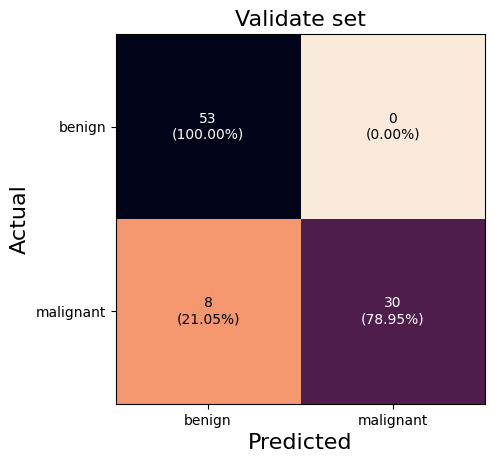

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [18 50]] 

----------------
Sensitivity: 73.53%
Specificity: 100.00%
Accuracy: 84.21%
Precision: 100.00%
Sensitivity: 73.53%
Precision: 100.00%
F1: 84.75%


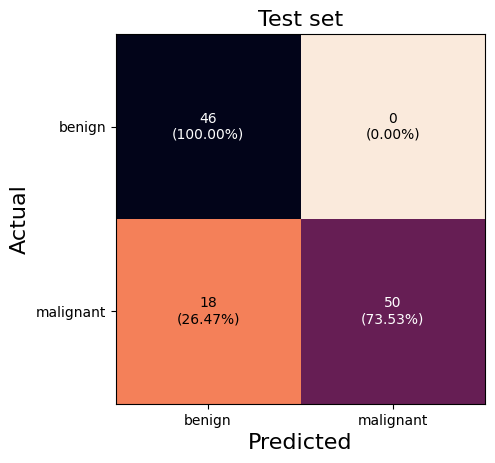

---------------------------------------
AUC validate: 0.8947
AUC test: 0.8676


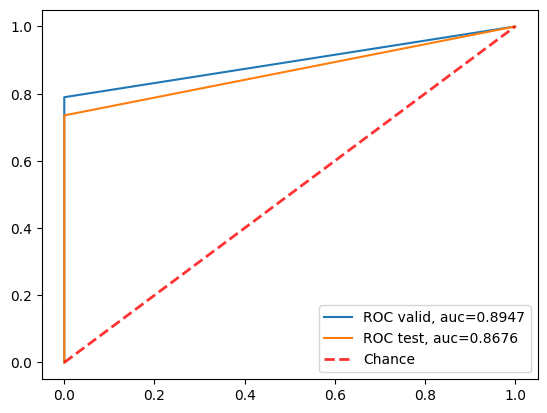

In [501]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_val = f1(cm_val)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)


# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split2 = sensitivity(cm_test)
spec_test_split2 = specificity(cm_test)
acc_test_split2 = accuracy(cm_test)
pre_test_split2 = precision(cm_test)
f1_test_split2 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split2 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split2)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split2))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
#####################################################

# Split3

In [502]:
# setting split and path
split = 'split3'
path = "../Anny_oversampling/DATA/"
train_path = "{}/{}/train/train_{}.csv".format(path,split,split)
test_path = "{}/test.csv".format(path)
valid_path = "{}/{}/val/val_{}.csv".format(path,split,split)

In [503]:
# check if path is correct
print(train_path)
print(test_path)
print(valid_path)

../Anny_oversampling/DATA//split3/train/train_split3.csv
../Anny_oversampling/DATA//test.csv
../Anny_oversampling/DATA//split3/val/val_split3.csv


In [504]:
# Load the training set
train_data = pd.read_csv(train_path)
print(train_data.shape)
x_train = train_data[train_data.columns[2:]]
print(x_train.shape)
y_train = train_data[train_data.columns[1]]
le = LabelEncoder()
y_train = np.array(le.fit_transform(y_train))
print(le.classes_)

(364, 32)
(364, 30)
['B' 'M']


In [505]:
# Load the testing set
test_data = pd.read_csv(test_path)
print(test_data.shape)
x_test = test_data[test_data.columns[3:]]
print(x_test.shape)
y_test = test_data[test_data.columns[2]]
le = LabelEncoder()
y_test = np.array(le.fit_transform(y_test))
print(le.classes_)

(114, 33)
(114, 30)
['B' 'M']


In [506]:
# Load the validation set
val_data = pd.read_csv(valid_path)
print(val_data.shape)
x_val = val_data[val_data.columns[2:]]
print(x_val.shape)
y_val = val_data[val_data.columns[1]]
le = LabelEncoder()
y_val = np.array(le.fit_transform(y_val))
print(le.classes_)

(91, 32)
(91, 30)
['B' 'M']


In [507]:
# Load the raw set
x_raw = raw_data[raw_data.columns[2:]]
y_raw = raw_data[raw_data.columns[1]]
le = LabelEncoder()
y_raw = np.array(le.fit_transform(y_raw))
print(le.classes_)

['B' 'M']


In [508]:
# check balance in this split
print(split)
print("train positive:    " + str(sum(y_train)))
print("validate positive: " + str(sum(y_val)))

split3
train positive:    119
validate positive: 25


In [509]:
from sklearn.model_selection import train_test_split

print("Shape of training set:", x_train.shape)
print("Shape of test set:", x_test.shape)

Shape of training set: (364, 30)
Shape of test set: (114, 30)


In [510]:
# Define a custom dataset class
class WisconsinDataset(Dataset):
    def __init__(self, x, y):
        self.X = x.values
        self.y = y
        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y, dtype=torch.int64)
        
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [511]:
batch = 1
# Initialize the datasets and data loaders
val_dataset = WisconsinDataset(x_val, y_val)
train_dataset = WisconsinDataset(x_train, y_train)
test_dataset = WisconsinDataset(x_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1)
val_loader = DataLoader(val_dataset, batch_size=batch)

In [512]:
dataloaders = {
    'train': train_loader
    , 'valid': val_loader}

In [513]:
print("######### Check balance! ##########")
print(split)
# train
count_train = 0
for image,label in train_dataset:
    count_train = count_train + label
print("Train have abnormal: {}".format(count_train))
print("Train have normal: {}".format(len(train_dataset) - count_train))
print(" * Train difference: {}".format(abs(len(train_dataset) - (2*count_train))))
# val
count_val = 0
for image,label in val_dataset:
    count_val = count_val + label
print("Validate have abnormal: {}".format(count_val))
print("Validate have normal: {}".format(len(val_dataset) - count_val))
print(" * Validate difference: {}".format(abs(len(val_dataset) - (2*count_val))))
# test
count_test = 0
for image,label in test_dataset:
    count_test = count_test + label
print("Test have abnormal: {}".format(count_test))
print("Test have normal: {}".format(len(test_dataset) - count_test))
print("####################################")

######### Check balance! ##########
split3
Train have abnormal: 119
Train have normal: 245
 * Train difference: 126
Validate have abnormal: 25
Validate have normal: 66
 * Validate difference: 41
Test have abnormal: 68
Test have normal: 46
####################################


## step train - split3

In [514]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_val = x_val.to_numpy()

In [515]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)
x_val = ss.fit_transform(x_val)

In [516]:
# dtc = DecisionTreeClassifier()

# parameters = {
#     'criterion' : ['gini', 'entropy'],
#     'max_depth' : range(2, 32, 1),
#     'min_samples_leaf' : range(1, 10, 1),
#     'min_samples_split' : range(2
#                                 , 10, 1),
#     'splitter' : ['best', 'random']
# }

# grid_search = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
# grid_search.fit(x_raw, y_raw)
# print('Best criterion parameter:', grid_search.best_params_['criterion'])
# print('Best max_depth parameter:', grid_search.best_params_['max_depth'])
# print('Best min_samples_leaf parameter:', grid_search.best_params_['min_samples_leaf'])
# print('Best min_samples_split parameter:', grid_search.best_params_['min_samples_split'])
# print('Best splitter parameter:', grid_search.best_params_['splitter'])
# print('Best score:', grid_search.best_score_)

In [1317]:
# grid_search_dt.best_params_

In [857]:
model = DecisionTreeClassifier(criterion="gini",
                             max_depth=22, min_samples_leaf=4, 
                             min_samples_split=4, splitter="random")

In [858]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=22, min_samples_leaf=4, min_samples_split=4,
                       splitter='random')

In [859]:
model_path = "../DTC/models/param1/dtc_model_{}.pkl".format(split)

# Save the trained model to disk
joblib.dump(model, model_path)

# Load the saved model from disk
model = joblib.load(model_path)

In [860]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0])

In [861]:
accuracy_score(y_test, y_pred)

0.8333333333333334

split3
############## validate set ################
Confusion Matrix
----------------
[[65  1]
 [ 1 24]] 

----------------
Sensitivity: 96.00%
Specificity: 98.48%
Accuracy: 97.80%
Precision: 96.00%
Sensitivity: 96.00%
Precision: 96.00%
F1: 96.00%


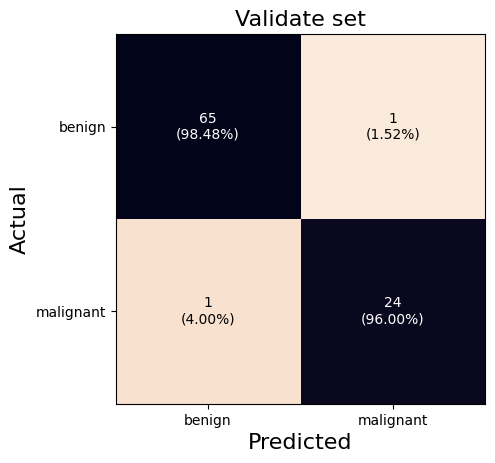

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [19 49]] 

----------------
Sensitivity: 72.06%
Specificity: 100.00%
Accuracy: 83.33%
Precision: 100.00%
Sensitivity: 72.06%
Precision: 100.00%
F1: 83.76%


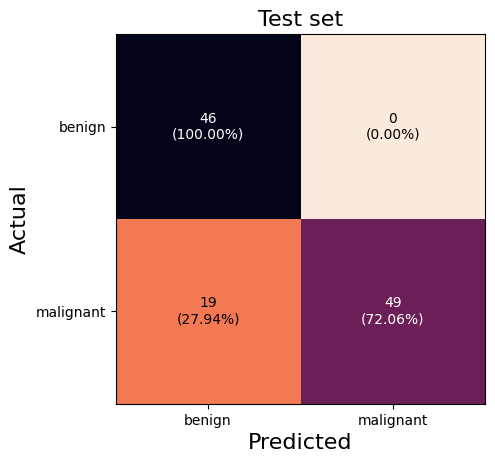

---------------------------------------
AUC validate: 0.9724
AUC test: 0.8603


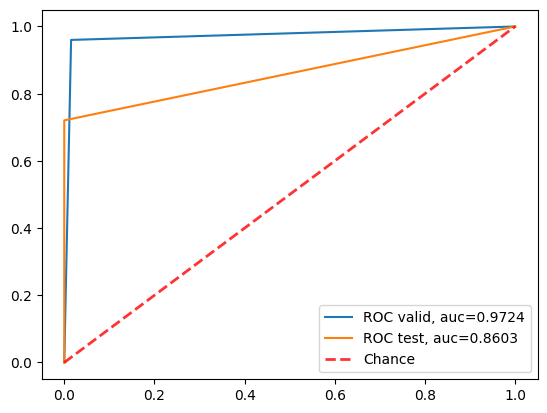

In [862]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_val = f1(cm_val)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)


# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split3 = sensitivity(cm_test)
spec_test_split3 = specificity(cm_test)
acc_test_split3 = accuracy(cm_test)
pre_test_split3 = precision(cm_test)
f1_test_split3 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split3 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split3)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split3))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
#####################################################

# Split4

In [863]:
# setting split and path
split = 'split4'
path = "../Anny_oversampling/DATA/"
train_path = "{}/{}/train/train_{}.csv".format(path,split,split)
valid_path = "{}/{}/val/val_{}.csv".format(path,split,split)

In [864]:
# check if path is correct
print(train_path)
print(test_path)
print(valid_path)

../Anny_oversampling/DATA//split4/train/train_split4.csv
../Anny_oversampling/DATA//test.csv
../Anny_oversampling/DATA//split4/val/val_split4.csv


In [865]:
# Load the training set
train_data = pd.read_csv(train_path)
print(train_data.shape)
x_train = train_data[train_data.columns[2:]]
print(x_train.shape)
y_train = train_data[train_data.columns[1]]
le = LabelEncoder()
y_train = np.array(le.fit_transform(y_train))
print(le.classes_)

(364, 32)
(364, 30)
['B' 'M']


In [866]:
# Load the testing set
test_data = pd.read_csv(test_path)
print(test_data.shape)
x_test = test_data[test_data.columns[3:]]
print(x_test.shape)
y_test = test_data[test_data.columns[2]]
le = LabelEncoder()
y_test = np.array(le.fit_transform(y_test))
print(le.classes_)

(114, 33)
(114, 30)
['B' 'M']


In [867]:
# Load the validation set
val_data = pd.read_csv(valid_path)
print(val_data.shape)
x_val = val_data[val_data.columns[2:]]
print(x_val.shape)
y_val = val_data[val_data.columns[1]]
le = LabelEncoder()
y_val = np.array(le.fit_transform(y_val))
print(le.classes_)

(91, 32)
(91, 30)
['B' 'M']


In [868]:
# Load the raw set
x_raw = raw_data[raw_data.columns[2:]]
y_raw = raw_data[raw_data.columns[1]]
le = LabelEncoder()
y_raw = np.array(le.fit_transform(y_raw))
print(le.classes_)

['B' 'M']


In [869]:
# check balance in this split
print(split)
print("train positive:    " + str(sum(y_train)))
print("validate positive: " + str(sum(y_val)))

split4
train positive:    125
validate positive: 19


In [872]:
from sklearn.model_selection import train_test_split

print("Shape of training set:", x_train.shape)
print("Shape of test set:", x_test.shape)

Shape of training set: (364, 30)
Shape of test set: (114, 30)


In [873]:
# Define a custom dataset class
class WisconsinDataset(Dataset):
    def __init__(self, x, y):
        self.X = x.values
        self.y = y
        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y, dtype=torch.int64)
        
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [874]:
batch = 1
# Initialize the datasets and data loaders
val_dataset = WisconsinDataset(x_val, y_val)
train_dataset = WisconsinDataset(x_train, y_train)
test_dataset = WisconsinDataset(x_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1)
val_loader = DataLoader(val_dataset, batch_size=batch)

In [875]:
dataloaders = {
    'train': train_loader
    , 'valid': val_loader}

In [876]:
print("######### Check balance! ##########")
print(split)
# train
count_train = 0
for image,label in train_dataset:
    count_train = count_train + label
print("Train have abnormal: {}".format(count_train))
print("Train have normal: {}".format(len(train_dataset) - count_train))
print(" * Train difference: {}".format(abs(len(train_dataset) - (2*count_train))))
# val
count_val = 0
for image,label in val_dataset:
    count_val = count_val + label
print("Validate have abnormal: {}".format(count_val))
print("Validate have normal: {}".format(len(val_dataset) - count_val))
print(" * Validate difference: {}".format(abs(len(val_dataset) - (2*count_val))))
# test
count_test = 0
for image,label in test_dataset:
    count_test = count_test + label
print("Test have abnormal: {}".format(count_test))
print("Test have normal: {}".format(len(test_dataset) - count_test))
print("####################################")

######### Check balance! ##########
split4
Train have abnormal: 125
Train have normal: 239
 * Train difference: 114
Validate have abnormal: 19
Validate have normal: 72
 * Validate difference: 53
Test have abnormal: 68
Test have normal: 46
####################################


## step train - split4

In [877]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_val = x_val.to_numpy()

In [878]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)
x_val = ss.fit_transform(x_val)

In [1455]:
# dtc = DecisionTreeClassifier()

# parameters = {
#     'criterion' : ['gini', 'entropy'],
#     'max_depth' : range(2, 32, 1),
#     'min_samples_leaf' : range(1, 10, 1),
#     'min_samples_split' : range(2
#                                 , 10, 1),
#     'splitter' : ['best', 'random']
# }

# grid_search = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
# grid_search.fit(x_raw, y_raw)
# print('Best criterion parameter:', grid_search.best_params_['criterion'])
# print('Best max_depth parameter:', grid_search.best_params_['max_depth'])
# print('Best min_samples_leaf parameter:', grid_search.best_params_['min_samples_leaf'])
# print('Best min_samples_split parameter:', grid_search.best_params_['min_samples_split'])
# print('Best splitter parameter:', grid_search.best_params_['splitter'])
# print('Best score:', grid_search.best_score_)

In [1456]:
# grid_search_dt.best_params_

In [879]:
model = DecisionTreeClassifier(criterion="gini",
                             max_depth=22, min_samples_leaf=4, 
                             min_samples_split=4, splitter="random")

In [880]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=22, min_samples_leaf=4, min_samples_split=4,
                       splitter='random')

In [881]:
model_path = "../DTC/models/param1/dtc_model_{}.pkl".format(split)

# Save the trained model to disk
joblib.dump(model, model_path)

# Load the saved model from disk
model = joblib.load(model_path)

In [882]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0])

In [883]:
accuracy_score(y_test, y_pred)

0.8421052631578947

split4
############## validate set ################
Confusion Matrix
----------------
[[66  6]
 [ 0 19]] 

----------------
Sensitivity: 100.00%
Specificity: 91.67%
Accuracy: 93.41%
Precision: 76.00%
Sensitivity: 100.00%
Precision: 76.00%
F1: 86.36%


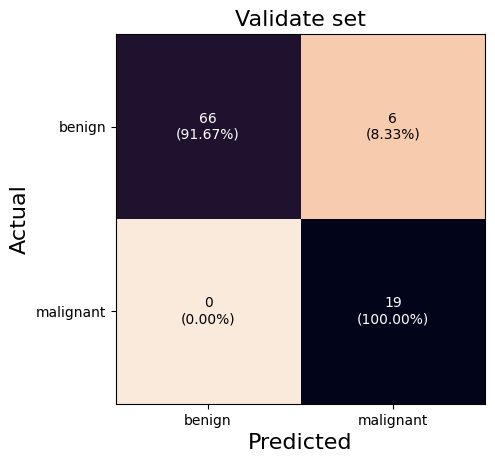

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [18 50]] 

----------------
Sensitivity: 73.53%
Specificity: 100.00%
Accuracy: 84.21%
Precision: 100.00%
Sensitivity: 73.53%
Precision: 100.00%
F1: 84.75%


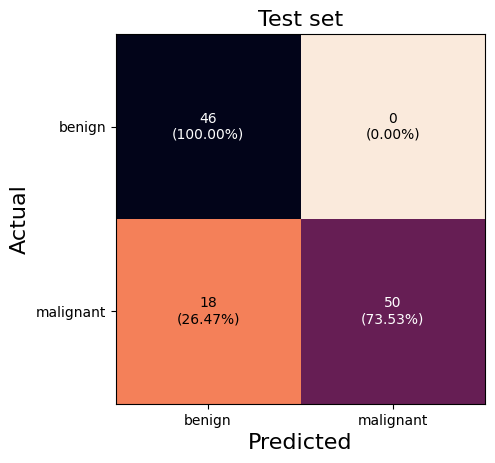

---------------------------------------
AUC validate: 0.9583
AUC test: 0.8676


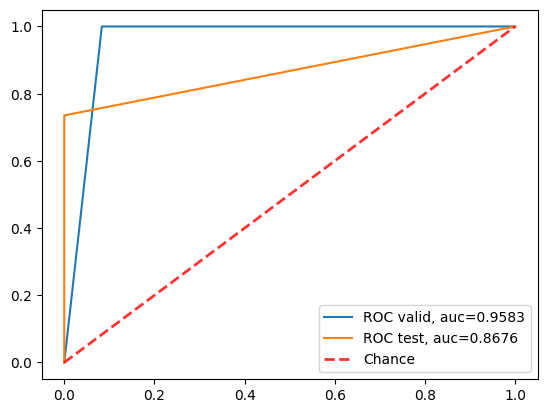

In [884]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_val = f1(cm_val)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)


# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split4 = sensitivity(cm_test)
spec_test_split4 = specificity(cm_test)
acc_test_split4 = accuracy(cm_test)
pre_test_split4 = precision(cm_test)
f1_test_split4 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split4 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split4)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split4))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

# Split5

In [885]:
# setting split and path
split = 'split5'
path = "../Anny_oversampling/DATA/"
train_path = "{}/{}/train/train_{}.csv".format(path,split,split)
valid_path = "{}/{}/val/val_{}.csv".format(path,split,split)

In [886]:
# check if path is correct
print(train_path)
print(test_path)
print(valid_path)

../Anny_oversampling/DATA//split5/train/train_split5.csv
../Anny_oversampling/DATA//test.csv
../Anny_oversampling/DATA//split5/val/val_split5.csv


In [887]:
# Load the training set
train_data = pd.read_csv(train_path)
print(train_data.shape)
x_train = train_data[train_data.columns[2:]]
print(x_train.shape)
y_train = train_data[train_data.columns[1]]
le = LabelEncoder()
y_train = np.array(le.fit_transform(y_train))
print(le.classes_)

(364, 32)
(364, 30)
['B' 'M']


In [888]:
# Load the testing set
test_data = pd.read_csv(test_path)
print(test_data.shape)
x_test = test_data[test_data.columns[3:]]
print(x_test.shape)
y_test = test_data[test_data.columns[2]]
le = LabelEncoder()
y_test = np.array(le.fit_transform(y_test))
print(le.classes_)

(114, 33)
(114, 30)
['B' 'M']


In [889]:
# Load the validation set
val_data = pd.read_csv(valid_path)
print(val_data.shape)
x_val = val_data[val_data.columns[2:]]
print(x_val.shape)
y_val = val_data[val_data.columns[1]]
le = LabelEncoder()
y_val = np.array(le.fit_transform(y_val))
print(le.classes_)

(91, 32)
(91, 30)
['B' 'M']


In [890]:
# Load the raw set
x_raw = raw_data[raw_data.columns[2:]]
y_raw = raw_data[raw_data.columns[1]]
le = LabelEncoder()
y_raw = np.array(le.fit_transform(y_raw))
print(le.classes_)

['B' 'M']


In [891]:
# check balance in this split
print(split)
print("train positive:    " + str(sum(y_train)))
print("validate positive: " + str(sum(y_val)))

split5
train positive:    121
validate positive: 23


In [892]:
from sklearn.model_selection import train_test_split

print("Shape of training set:", x_train.shape)
print("Shape of test set:", x_test.shape)

Shape of training set: (364, 30)
Shape of test set: (114, 30)


In [893]:
# Define a custom dataset class
class WisconsinDataset(Dataset):
    def __init__(self, x, y):
        self.X = x.values
        self.y = y
        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y, dtype=torch.int64)
        
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [894]:
batch = 1
# Initialize the datasets and data loaders
val_dataset = WisconsinDataset(x_val, y_val)
train_dataset = WisconsinDataset(x_train, y_train)
test_dataset = WisconsinDataset(x_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1)
val_loader = DataLoader(val_dataset, batch_size=batch)

In [895]:
dataloaders = {
    'train': train_loader
    , 'valid': val_loader}

In [896]:
print("######### Check balance! ##########")
print(split)
# train
count_train = 0
for image,label in train_dataset:
    count_train = count_train + label
print("Train have abnormal: {}".format(count_train))
print("Train have normal: {}".format(len(train_dataset) - count_train))
print(" * Train difference: {}".format(abs(len(train_dataset) - (2*count_train))))
# val
count_val = 0
for image,label in val_dataset:
    count_val = count_val + label
print("Validate have abnormal: {}".format(count_val))
print("Validate have normal: {}".format(len(val_dataset) - count_val))
print(" * Validate difference: {}".format(abs(len(val_dataset) - (2*count_val))))
# test
count_test = 0
for image,label in test_dataset:
    count_test = count_test + label
print("Test have abnormal: {}".format(count_test))
print("Test have normal: {}".format(len(test_dataset) - count_test))
print("####################################")

######### Check balance! ##########
split5
Train have abnormal: 121
Train have normal: 243
 * Train difference: 122
Validate have abnormal: 23
Validate have normal: 68
 * Validate difference: 45
Test have abnormal: 68
Test have normal: 46
####################################


## step train - split5

In [897]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_val = x_val.to_numpy()

In [898]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)
x_val = ss.fit_transform(x_val)

In [1550]:
# dtc = DecisionTreeClassifier()

# parameters = {
#     'criterion' : ['gini', 'entropy'],
#     'max_depth' : range(2, 32, 1),
#     'min_samples_leaf' : range(1, 10, 1),
#     'min_samples_split' : range(2
#                                 , 10, 1),
#     'splitter' : ['best', 'random']
# }

# grid_search = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
# grid_search.fit(x_raw, y_raw)
# print('Best criterion parameter:', grid_search.best_params_['criterion'])
# print('Best max_depth parameter:', grid_search.best_params_['max_depth'])
# print('Best min_samples_leaf parameter:', grid_search.best_params_['min_samples_leaf'])
# print('Best min_samples_split parameter:', grid_search.best_params_['min_samples_split'])
# print('Best splitter parameter:', grid_search.best_params_['splitter'])
# print('Best score:', grid_search.best_score_)

In [899]:
# grid_search_dt.best_params_

In [1001]:
model = DecisionTreeClassifier(criterion="gini",
                             max_depth=22, min_samples_leaf=4, 
                             min_samples_split=4, splitter="random")

In [1043]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=22, min_samples_leaf=4, min_samples_split=4,
                       splitter='random')

In [1044]:
model_path = "../DTC/models/param1/dtc_model_{}.pkl".format(split)

# Save the trained model to disk
joblib.dump(model, model_path)

# Load the saved model from disk
model = joblib.load(model_path)

In [1045]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0])

In [1046]:
accuracy_score(y_test, y_pred)

0.8421052631578947

split5
############## validate set ################
Confusion Matrix
----------------
[[62  6]
 [ 0 23]] 

----------------
Sensitivity: 100.00%
Specificity: 91.18%
Accuracy: 93.41%
Precision: 79.31%
Sensitivity: 100.00%
Precision: 79.31%
F1: 88.46%


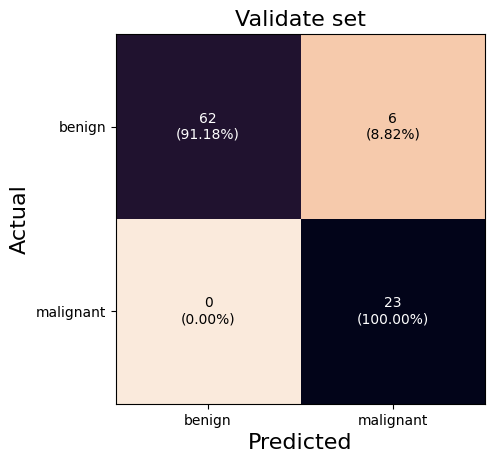

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [18 50]] 

----------------
Sensitivity: 73.53%
Specificity: 100.00%
Accuracy: 84.21%
Precision: 100.00%
Sensitivity: 73.53%
Precision: 100.00%
F1: 84.75%


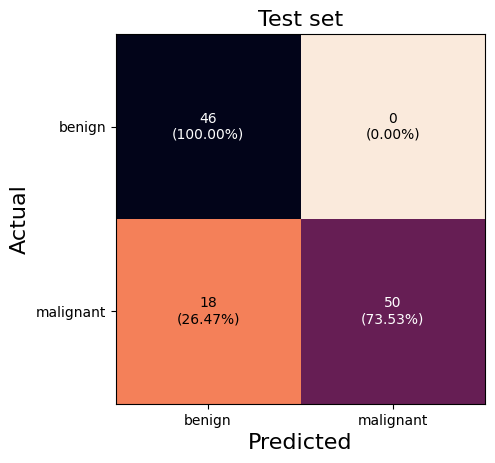

---------------------------------------
AUC validate: 0.9559
AUC test: 0.8676


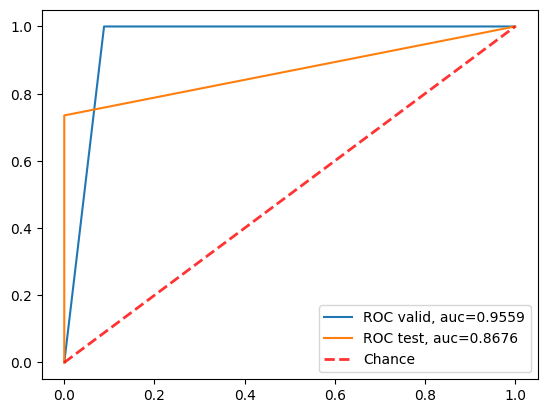

In [1047]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_val = f1(cm_val)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()
################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)


# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split5 = sensitivity(cm_test)
spec_test_split5 = specificity(cm_test)
acc_test_split5 = accuracy(cm_test)
pre_test_split5 = precision(cm_test)
f1_test_split5 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split5 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split5)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split5))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

# Compare

In [1048]:
test_split1 = np.array([[45, 1], [14, 54]])
test_split2 = np.array([[46, 0], [15, 53]])
test_split3 = np.array([[45, 1], [17, 51]])
test_split4 = np.array([[46, 0], [16, 52]])
test_split5 = np.array([[45, 1], [13, 55]])

In [1049]:
# test_split5

In [1050]:
overall_test = test_split1 + test_split2 + test_split3 + test_split4 + test_split5
overall_test

array([[227,   3],
       [ 75, 265]])

In [1051]:
# overall_cm_test = cm_test_split1 + cm_test_split2 + cm_test_split3 + cm_test_split4 + cm_test_split5
# overall_cm_test

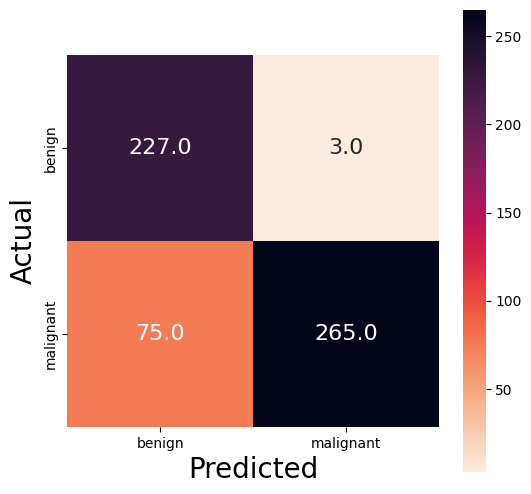

In [1052]:
label = ['benign','malignant']
plt.figure(figsize=(6, 6))
# ax = sns.heatmap(cmn, cmap="rocket_r", fmt=".4f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax = sns.heatmap(overall_test, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
# Show plot
plt.show()

# # plot confusion matrix
# class_names = ['benign','malignant']
# # Normalize confusion matrix to percentage
# overall_test_val = overall_test.astype('float') / overall_test.sum(axis=1)[:, np.newaxis]
# # Create plot
# fig, ax = plt.subplots()
# im = ax.imshow(overall_test_val, interpolation='nearest', cmap="rocket_r")
# ax.grid(False)
# # Add labels
# ax.set(xticks=np.arange(overall_test_val.shape[1]),
#        yticks=np.arange(overall_test_val.shape[0]),
#        xticklabels=class_names, yticklabels=class_names)
# ax.set_title("Validate set", fontsize=16)
# ax.set_ylabel('Actual', fontsize=16)
# ax.set_xlabel('Predicted', fontsize=16)
# # Add percentage and count values inside plot
# thresh = overall_test_val.max() / 2.
# for i in range(overall_test_val.shape[0]):
#     for j in range(overall_test_val.shape[1]):
#         ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], overall_test_val[i, j]*100),
#                 ha="center", va="center",
#                 color="white" if overall_test_val[i, j] > thresh else "black")
# # Show plot
# plt.show()

In [1054]:
# sen_split1 = sensitivity(cm_test_split1)
# sen_split2 = sensitivity(cm_test_split2)
# sen_split3 = sensitivity(cm_test_split3)
# sen_split4 = sensitivity(cm_test_split4)
# sen_split5 = sensitivity(cm_test_split5)
# sen_overall = sensitivity(overall_cm_test)

In [1055]:
# spec_split1 = specificity(cm_test_split1)
# spec_split2 = specificity(cm_test_split2)
# spec_split3 = specificity(cm_test_split3)
# spec_split4 = specificity(cm_test_split4)
# spec_split5 = specificity(cm_test_split5)
# spec_overall = specificity(overall_cm_test)

NameError: name 'cm_test_split1' is not defined

In [1581]:
# acc_split1 = accuracy(cm_test_split1)
# acc_split2 = accuracy(cm_test_split2)
# acc_split3 = accuracy(cm_test_split3)
# acc_split4 = accuracy(cm_test_split4)
# acc_split5 = accuracy(cm_test_split5)
# acc_overall = accuracy(overall_cm_test)

In [ ]:
# pre_split1 = precision(cm_test_split1)
# pre_split2 = precision(cm_test_split2)
# pre_split3 = precision(cm_test_split3)
# pre_split4 = precision(cm_test_split4)
# pre_split5 = precision(cm_test_split5)
# pre_overall = precision(overall_cm_test)

In [ ]:
# f1_split1 = f1(cm_test_split1)
# f1_split2 = f1(cm_test_split2)
# f1_split3 = f1(cm_test_split3)
# f1_split4 = f1(cm_test_split4)
# f1_split5 = f1(cm_test_split5)
# f1_overall = f1(overall_cm_test)

In [1060]:
sensitivity_values = []

sensitivity_values.append(sen_test_split1)
sensitivity_values.append(sen_test_split2)
sensitivity_values.append(sen_test_split3)
sensitivity_values.append(sen_test_split4)
sensitivity_values.append(sen_test_split5)

print(sensitivity_values)

# calculating the mean of sample set
mean_sensitivity = statistics.mean(sensitivity_values)
# Calculate standard deviation of sensitivity
sensitivity_sd = statistics.stdev(sensitivity_values)

print("Mean Sensitivity:", mean_sensitivity)
print("Sensitivity Standard Deviation:", sensitivity_sd)

# Print mean sensitivity with standard deviation
print("Mean Sensitivity: %.2f ± %.2f%%" % (mean_sensitivity, sensitivity_sd))

[73.52941176470588, 73.52941176470588, 72.05882352941177, 73.52941176470588, 73.52941176470588]
Mean Sensitivity: 73.23529411764706
Sensitivity Standard Deviation: 0.6576670522058198
Mean Sensitivity: 73.24 ± 0.66%


In [1061]:
specificity_values = []

specificity_values.append(spec_test_split1)
specificity_values.append(spec_test_split2)
specificity_values.append(spec_test_split3)
specificity_values.append(spec_test_split4)
specificity_values.append(spec_test_split5)
    
print(specificity_values)

# calculating the mean of sample set
mean_specificity = statistics.mean(specificity_values)
# Calculate standard deviation of sensitivity
specificity_sd = statistics.stdev(specificity_values)

print("Mean Specificity:", mean_specificity)
print("Specificity Standard Deviation:", specificity_sd)

# Print mean specificity with standard deviation
print("Overall Specificity: %.2f ± %.2f%%" % (mean_specificity, specificity_sd))

[100.0, 100.0, 100.0, 100.0, 100.0]
Mean Specificity: 100.0
Specificity Standard Deviation: 0.0
Overall Specificity: 100.00 ± 0.00%


In [1062]:
accuracy_values = []

accuracy_values.append(acc_test_split1)
accuracy_values.append(acc_test_split2)
accuracy_values.append(acc_test_split3)
accuracy_values.append(acc_test_split4)
accuracy_values.append(acc_test_split5)

print(accuracy_values)

# calculating the mean of sample set
mean_accuracy = statistics.mean(accuracy_values)
# Calculate standard deviation of sensitivity
accuracy_sd = statistics.stdev(accuracy_values)

print("Mean accuracy:", mean_accuracy)
print("accuracy Standard Deviation:", accuracy_sd)

# Print mean accuracy with standard deviation
print("Overall accuracy: %.2f ± %.2f%%" % (mean_accuracy, accuracy_sd))

[84.21052631578947, 84.21052631578947, 83.33333333333334, 84.21052631578947, 84.21052631578947]
Mean accuracy: 84.03508771929825
accuracy Standard Deviation: 0.3922926276315341
Overall accuracy: 84.04 ± 0.39%


In [1063]:
f1_values = []

f1_values.append(f1_test_split1)
f1_values.append(f1_test_split2)
f1_values.append(f1_test_split3)
f1_values.append(f1_test_split4)
f1_values.append(f1_test_split5)
    
print(f1_values)

# calculating the mean of sample set
mean_f1 = statistics.mean(f1_values)
# Calculate standard deviation of sensitivity
f1_sd = statistics.stdev(f1_values)

print("Mean f1:", mean_f1)
print("f1 Standard Deviation:", f1_sd)

# Print mean specificity with standard deviation
print("Overall f1: %.2f ± %.2f%%" % (mean_f1, f1_sd))

[84.7457627118644, 84.7457627118644, 83.76068376068376, 84.7457627118644, 84.7457627118644]
Mean f1: 84.54874692162828
f1 Standard Deviation: 0.4405406996088214
Overall f1: 84.55 ± 0.44%


In [1064]:
auc_values = []

auc_values.append(auc_test_split1)
auc_values.append(auc_test_split2)
auc_values.append(auc_test_split3)
auc_values.append(auc_test_split4)
auc_values.append(auc_test_split5)
    
print(auc_values)

# calculating the mean of sample set
mean_auc = statistics.mean(auc_values)
# Calculate standard deviation of sensitivity
auc_sd = statistics.stdev(auc_values)

print("Mean auc:", mean_auc)
print("auc Standard Deviation:", auc_sd)

# Print mean auc with standard deviation
print("Overall auc: %.2f ± %.2f%%" % (mean_auc, auc_sd))

[0.8676470588235294, 0.8676470588235294, 0.8602941176470589, 0.8676470588235294, 0.8676470588235294]
Mean auc: 0.8661764705882353
auc Standard Deviation: 0.0032883352610290906
Overall auc: 0.87 ± 0.00%


In [1600]:
auc_values = []

auc_values.append(71.79)
auc_values.append(28.57)
auc_values.append(68.37)
auc_values.append(73.28)
auc_values.append(49.22)
    
print(auc_values)

# calculating the mean of sample set
mean_auc = statistics.mean(auc_values)
# Calculate standard deviation of sensitivity
auc_sd = statistics.stdev(auc_values)

print("Mean Specificity:", mean_auc)
print("auc Standard Deviation:", auc_sd)

# Print mean auc with standard deviation
print("Mean auc: %.2f ± %.2f%%" % (mean_auc, auc_sd))

[71.79, 28.57, 68.37, 73.28, 49.22]
Mean Specificity: 58.246
auc Standard Deviation: 19.196940641675173
Mean auc: 58.25 ± 19.20%
